<a href="https://colab.research.google.com/github/arshvohra29/Analytics/blob/main/Loan_Holder_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df1=pd.read_csv("Part2 - Data1.csv")
df2=pd.read_csv("Part2 -Data2.csv")

In [ ]:
df1.shape

(5000, 8)

In [ ]:
df2.shape

(5000, 7)

In [ ]:
(df1.isna().sum()/df1.shape[0])*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
dtype: float64

In [ ]:
(df2.isna().sum()/df2.shape[0])*100

ID                     0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [ ]:
#Merging the two data
df = pd.concat([df1,df2],axis=1)

In [ ]:
df.head(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,2,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,3,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,4,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,5,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,6,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,7,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,8,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,9,104,0,0,1,0,NaN
9,10,34,9,180,93023,1,8.9,3,10,0,0,0,0,0,1.0


In [ ]:
col = ['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']
for i in col:
  df[i] = df[i].astype("category")

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   int64   
 1   CustomerSince        5000 non-null   int64   
 2   HighestSpend         5000 non-null   int64   
 3   ZipCode              5000 non-null   int64   
 4   HiddenScore          5000 non-null   category
 5   MonthlyAverageSpend  5000 non-null   float64 
 6   Level                5000 non-null   category
 7   Mortgage             5000 non-null   int64   
 8   Security             5000 non-null   category
 9   FixedDepositAccount  5000 non-null   category
 10  InternetBanking      5000 non-null   category
 11  CreditCard           5000 non-null   category
 12  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.6 KB


In [ ]:
#checking Null Value Percentage
(df.isna().sum()/df.shape[0])*100

Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(4980, 13)

 Number of outliers in Age is 0


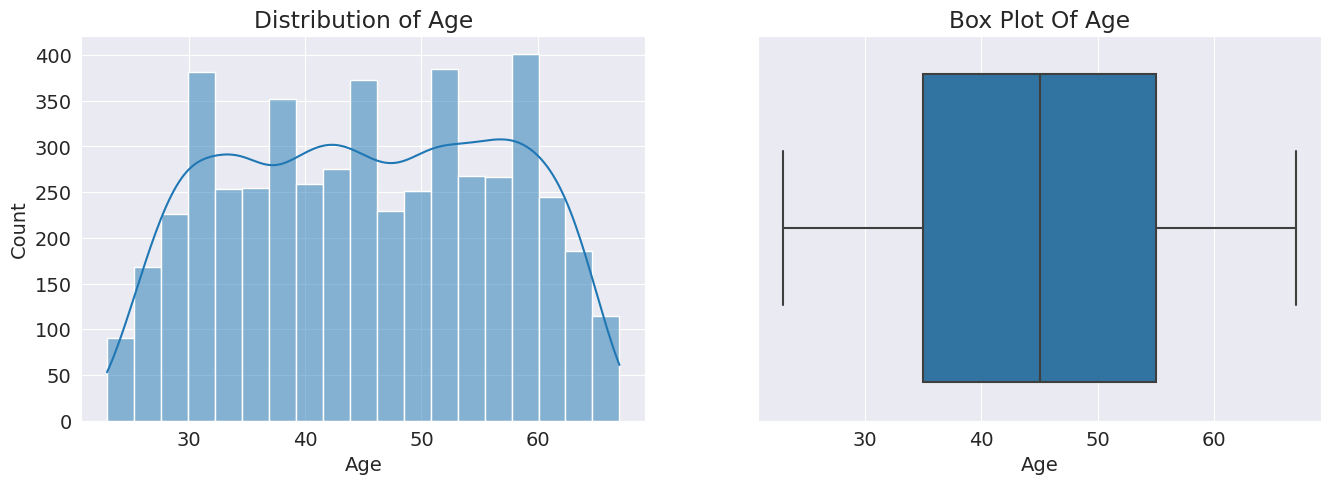

In [ ]:
#Age
fig,axes = plt.subplots(1,2,figsize=(16,5))
sns.histplot(data=df,x='Age',ax=axes[0],kde=True)
sns.boxplot(data=df,x='Age',ax=axes[1])
axes[0].set_title('Distribution of Age')
axes[1].set_title('Box Plot Of Age')

#Checking The count
q25,q75 = np.percentile(df['Age'],25),np.percentile(df['Age'],75)
IQR = q75-q25
upper= q75 + (1.5 * IQR) 
lower= q25 - (1.5*IQR)
outl=0
for i in df['Age']:
  if i > upper or i < lower:
    outl+=1
print("{} Number of outliers in Age is {}".format('\033[1m',outl))


 Number of outliers in Age is 0


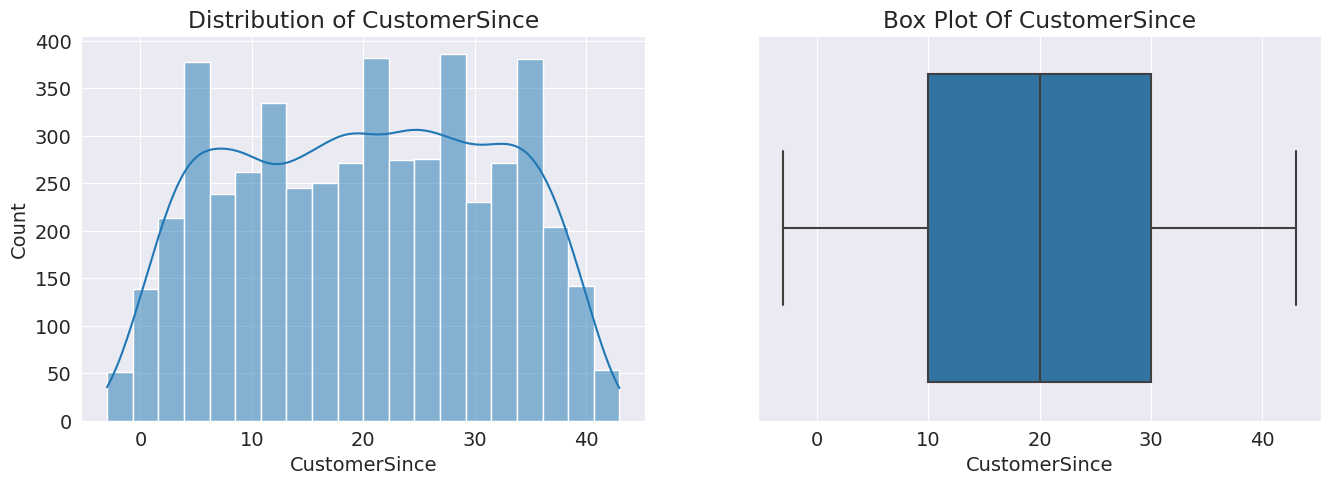

In [ ]:
#CustomerSince
fig,axes = plt.subplots(1,2,figsize=(16,5))
sns.histplot(data=df,x='CustomerSince',ax=axes[0],kde=True)
sns.boxplot(data=df,x='CustomerSince',ax=axes[1])
axes[0].set_title('Distribution of CustomerSince')
axes[1].set_title('Box Plot Of CustomerSince')

#Checking The count
q25,q75 = np.percentile(df['CustomerSince'],25),np.percentile(df['CustomerSince'],75)
IQR = q75-q25
upper= q75 + (1.5 * IQR) 
lower= q25 - (1.5*IQR)
outl=0
for i in df['CustomerSince']:
  if i > upper or i < lower:
    outl+=1
print("{} Number of outliers in Age is {}".format('\033[1m',outl))


 Number of outliers in HighestSpend is 96


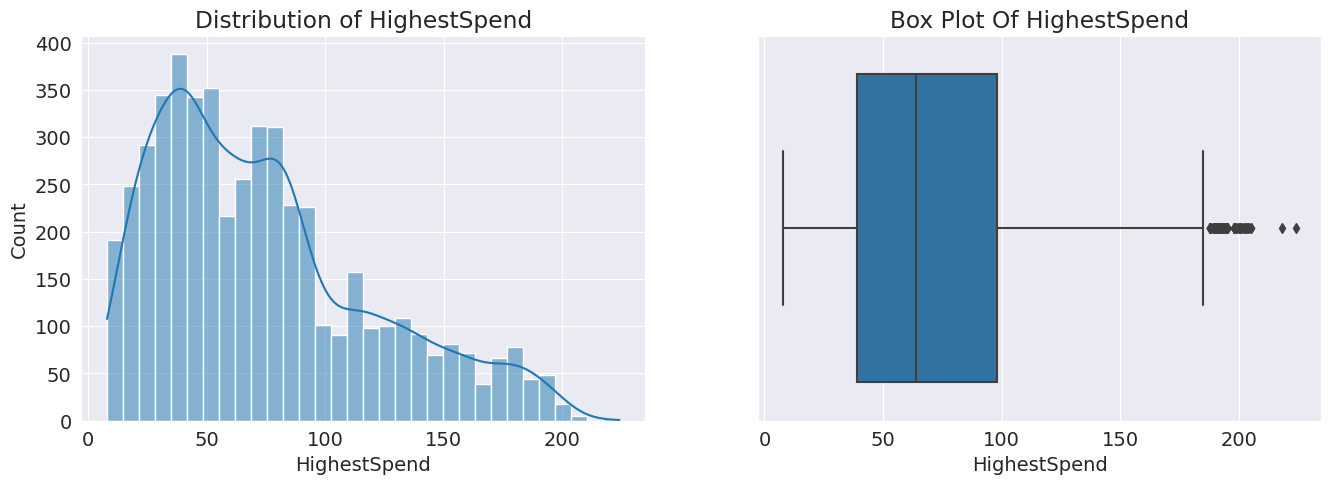

In [ ]:
#HighestSpend
fig,axes = plt.subplots(1,2,figsize=(16,5))
sns.histplot(data=df,x='HighestSpend',ax=axes[0],kde=True)
sns.boxplot(data=df,x='HighestSpend',ax=axes[1])
axes[0].set_title('Distribution of HighestSpend')
axes[1].set_title('Box Plot Of HighestSpend')

#Checking The count
q25,q75 = np.percentile(df['HighestSpend'],25),np.percentile(df['HighestSpend'],75)
IQR = q75-q25
upper= q75 + (1.5 * IQR) 
lower= q25 - (1.5*IQR)
outl=0
for i in df['HighestSpend']:
  if i > upper or i < lower:
    outl+=1
print("{} Number of outliers in HighestSpend is {}".format('\033[1m',outl))

 Number of outliers in MonthlyAverageSpend is 324


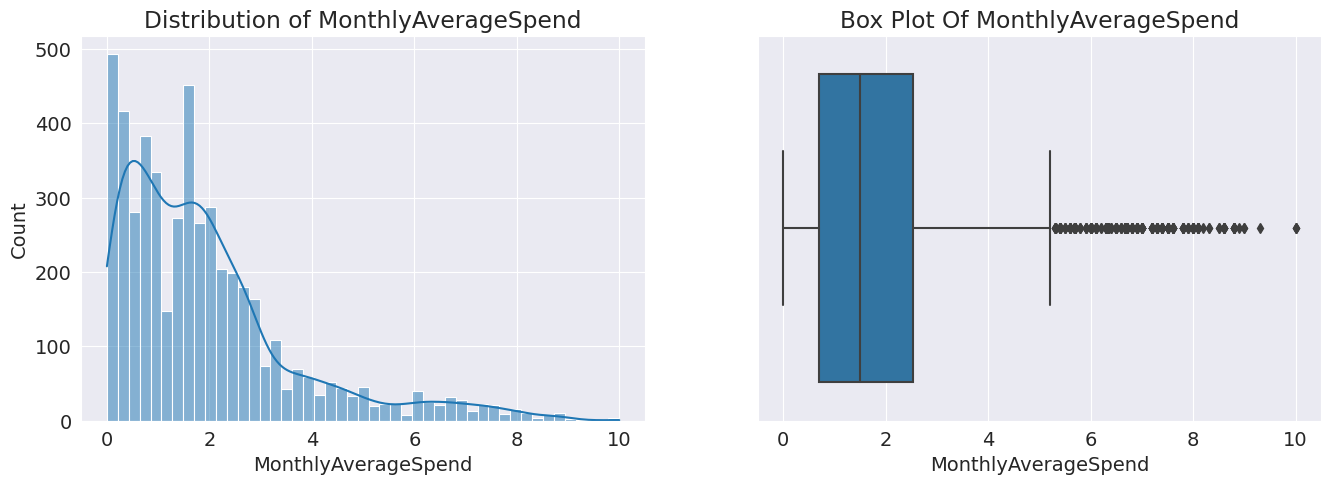

In [ ]:
# MonthlyAverageSpend
fig,axes = plt.subplots(1,2,figsize=(16,5))
sns.histplot(data=df,x='MonthlyAverageSpend',ax=axes[0],kde=True)
sns.boxplot(data=df,x='MonthlyAverageSpend',ax=axes[1])
axes[0].set_title('Distribution of MonthlyAverageSpend')
axes[1].set_title('Box Plot Of MonthlyAverageSpend')

#Checking The count
q25,q75 = np.percentile(df['MonthlyAverageSpend'],25),np.percentile(df['MonthlyAverageSpend'],75)
IQR = q75-q25
upper= q75 + (1.5 * IQR) 
lower= q25 - (1.5*IQR)
outl=0
for i in df['MonthlyAverageSpend']:
  if i > upper or i < lower:
    outl+=1
print("{} Number of outliers in MonthlyAverageSpend is {}".format('\033[1m',outl))

 Number of outliers in Mortgage is 291


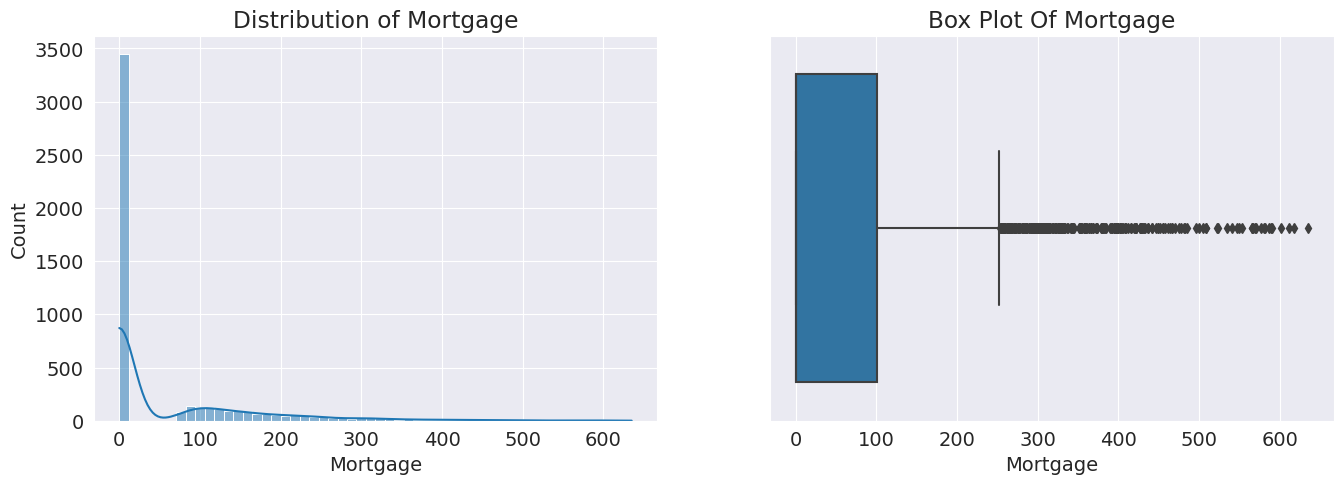

In [ ]:
# Mortgage
fig,axes = plt.subplots(1,2,figsize=(16,5))
sns.histplot(data=df,x='Mortgage',ax=axes[0],kde=True)
sns.boxplot(data=df,x='Mortgage',ax=axes[1])
axes[0].set_title('Distribution of Mortgage')
axes[1].set_title('Box Plot Of Mortgage')

#Checking The count
q25,q75 = np.percentile(df['Mortgage'],25),np.percentile(df['Mortgage'],75)
IQR = q75-q25
upper= q75 + (1.5 * IQR) 
lower= q25 - (1.5*IQR)
outl=0
for i in df['Mortgage']:
  if i > upper or i < lower:
    outl+=1
print("{} Number of outliers in Mortgage is {}".format('\033[1m',outl))

 Number of outliers in ZipCode is 1


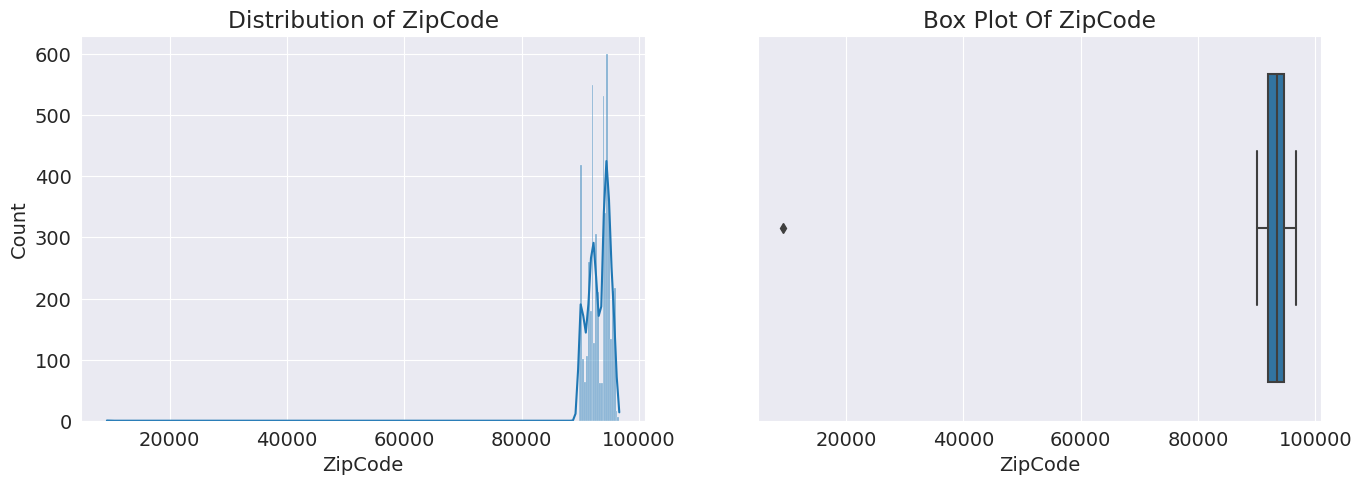

In [ ]:
#ZipCode
fig,axes = plt.subplots(1,2,figsize=(16,5))
sns.histplot(data=df,x='ZipCode',ax=axes[0],kde=True)
sns.boxplot(data=df,x='ZipCode',ax=axes[1])
axes[0].set_title('Distribution of ZipCode')
axes[1].set_title('Box Plot Of ZipCode')

#Checking The count
q25,q75 = np.percentile(df['ZipCode'],25),np.percentile(df['ZipCode'],75)
IQR = q75-q25
upper= q75 + (1.5 * IQR) 
lower= q25 - (1.5*IQR)
outl=0
for i in df['ZipCode']:
  if i > upper or i < lower:
    outl+=1
print("{} Number of outliers in ZipCode is {}".format('\033[1m',outl))

Text(0.5, 0.98, 'Distibution OF Level')

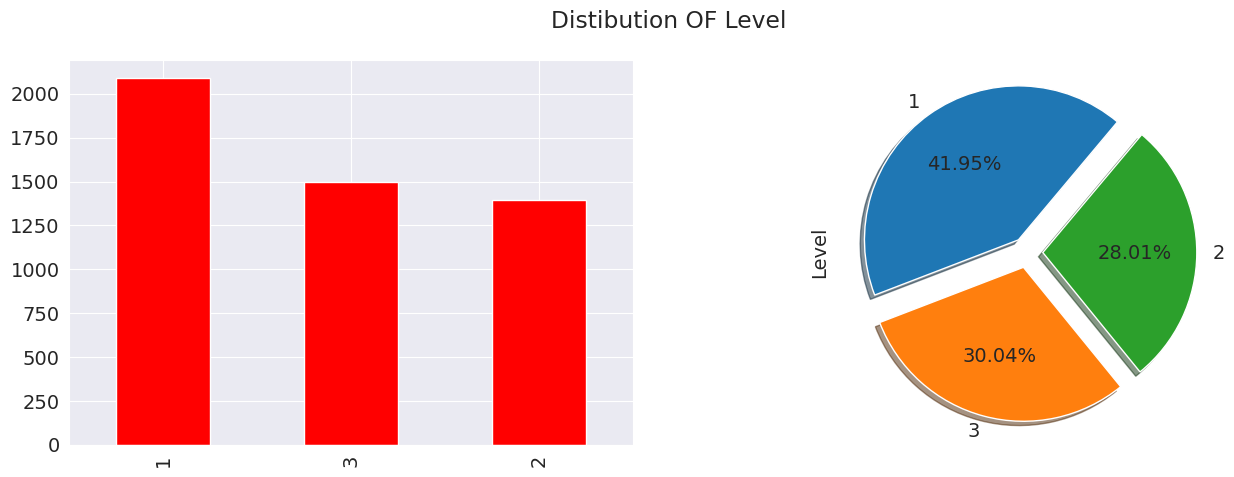

In [ ]:
#Level
fig,axes = plt.subplots(1,2,figsize=(16,5))
df['Level'].value_counts().plot(kind='bar',ax=axes[0],color='r')
df['Level'].value_counts().plot.pie(autopct='%0.2f%%',shadow=True,startangle=50,explode=[0.1,0.1,0.1])
fig.suptitle('Distibution OF Level')

Text(0.5, 0.98, 'Distibution OF HighestSpend')

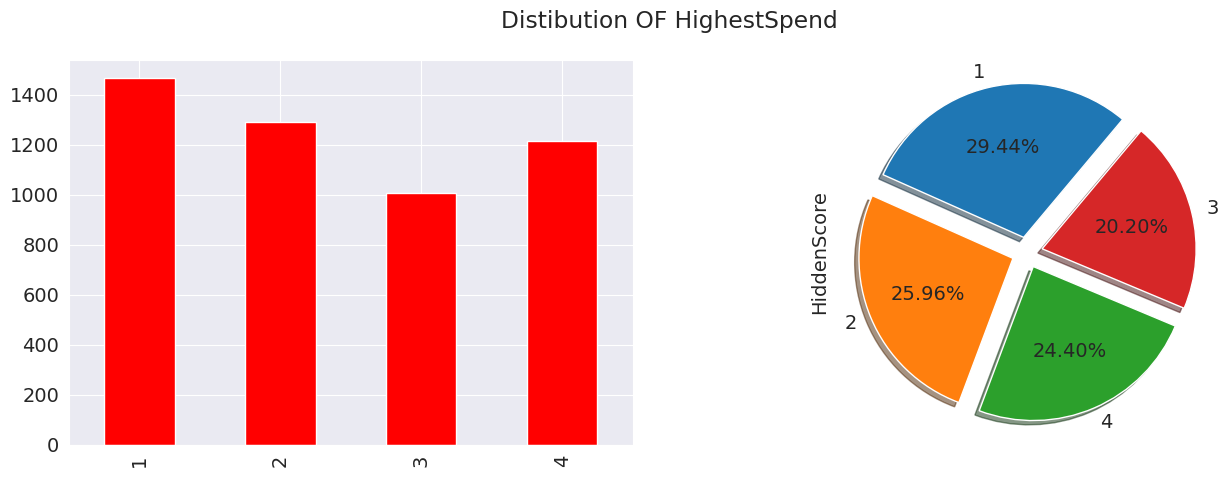

In [ ]:
#HighestSpend
fig,axes = plt.subplots(1,2,figsize=(16,5))
df['HiddenScore'].value_counts().sort_index().plot(kind='bar',color='r', ax=axes[0])
df['HiddenScore'].value_counts().plot.pie(autopct='%0.2f%%',shadow=True,startangle=50,explode=[0.1,0.1,0.1,0.1])
fig.suptitle('Distibution OF HighestSpend')

Text(0.5, 0.98, 'Distibution OF Security')

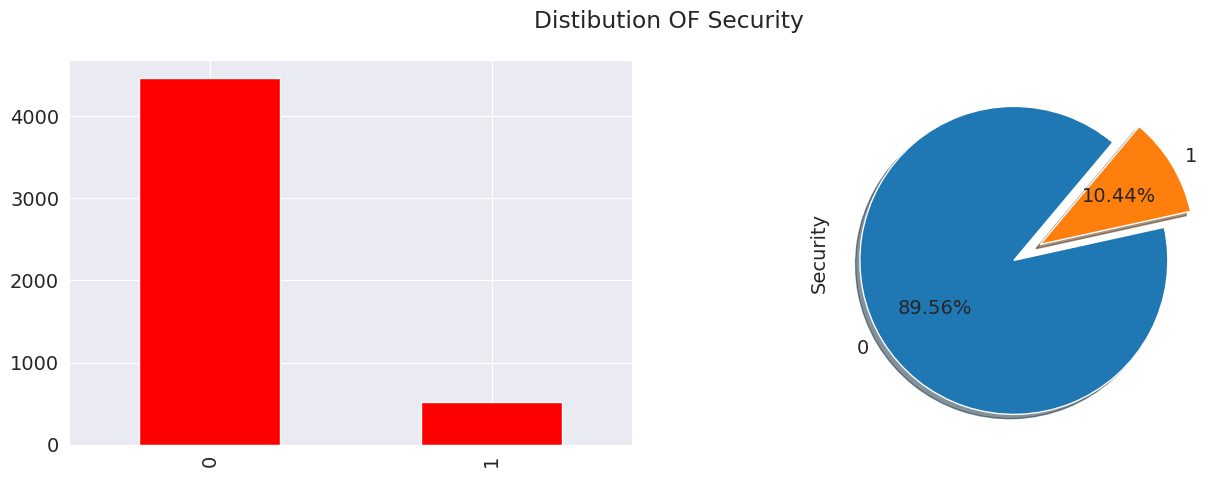

In [ ]:
#Security
fig,axes = plt.subplots(1,2,figsize=(16,5))
df['Security'].value_counts().sort_index().plot(kind='bar',color='r', ax=axes[0])
df['Security'].value_counts().plot.pie(autopct='%0.2f%%',shadow=True,startangle=50,explode=[0.1,0.1])
fig.suptitle('Distibution OF Security')

Text(0.5, 0.98, 'Distibution OF FixedDepositAccount')

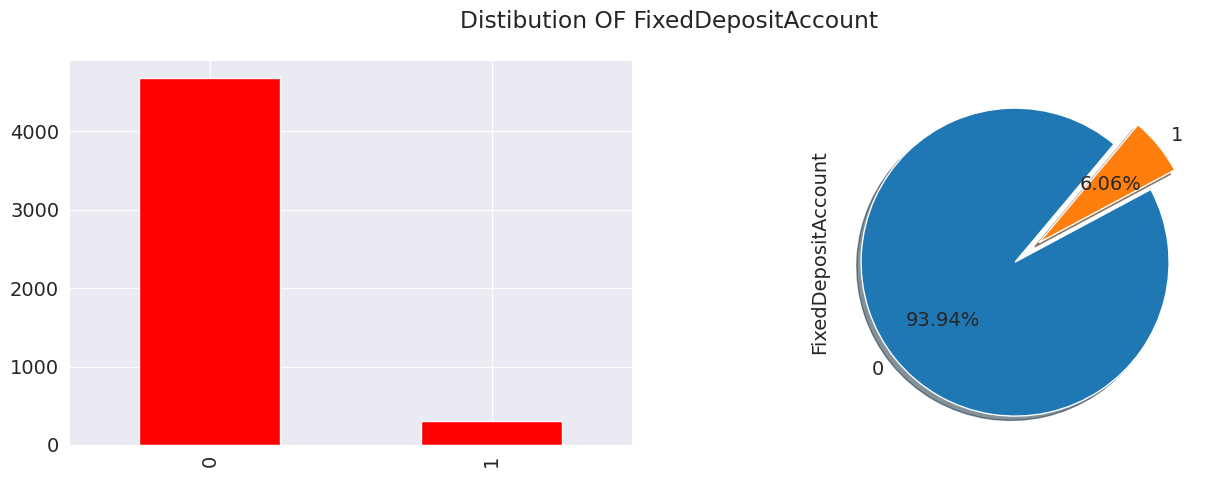

In [ ]:
#FixedDepositAccount
fig,axes = plt.subplots(1,2,figsize=(16,5))
df['FixedDepositAccount'].value_counts().sort_index().plot(kind='bar',color='r', ax=axes[0])
df['FixedDepositAccount'].value_counts().plot.pie(autopct='%0.2f%%',shadow=True,startangle=50,explode=[0.1,0.1])
fig.suptitle('Distibution OF FixedDepositAccount')

Text(0.5, 0.98, 'Distibution OF InternetBanking')

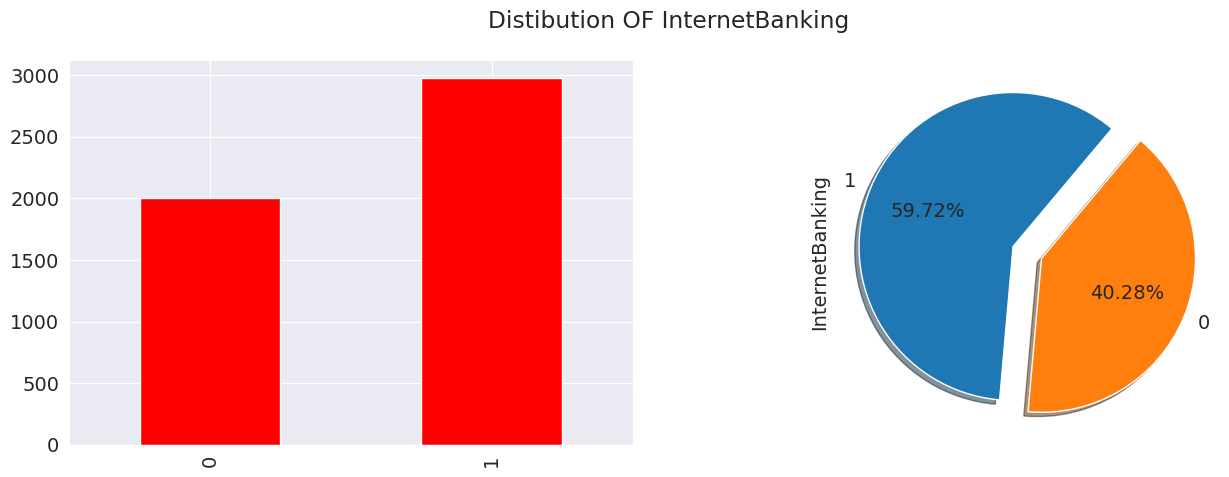

In [ ]:
#InternetBanking
fig,axes = plt.subplots(1,2,figsize=(16,5))
df['InternetBanking'].value_counts().sort_index().plot(kind='bar',color='r', ax=axes[0])
df['InternetBanking'].value_counts().plot.pie(autopct='%0.2f%%',shadow=True,startangle=50,explode=[0.1,0.1])
fig.suptitle('Distibution OF InternetBanking')

Text(0.5, 0.98, 'Distibution OF CreditCard')

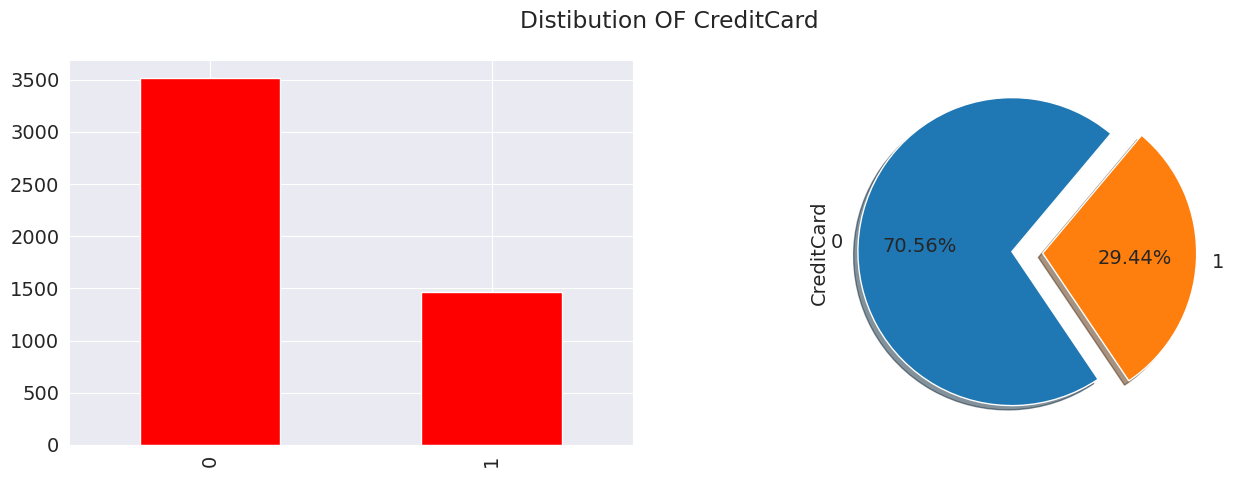

In [ ]:
#CreditCard
fig,axes = plt.subplots(1,2,figsize=(16,5))
df['CreditCard'].value_counts().sort_index().plot(kind='bar',color='r', ax=axes[0])
df['CreditCard'].value_counts().plot.pie(autopct='%0.2f%%',shadow=True,startangle=50,explode=[0.1,0.1])
fig.suptitle('Distibution OF CreditCard')

Text(0.5, 0.98, 'Distibution OF LoanOnCard')

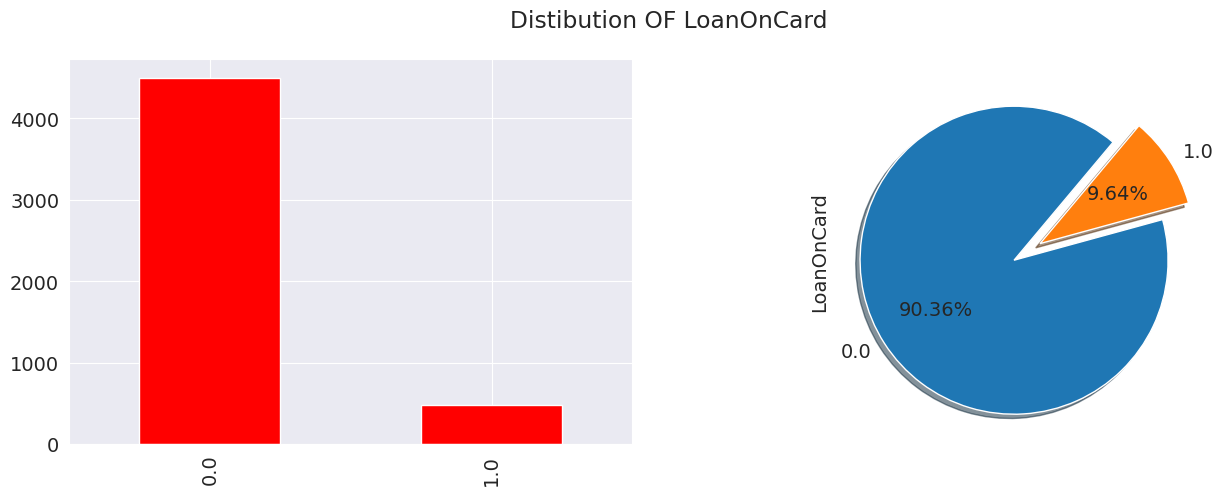

In [ ]:
#LoanOnCard
fig,axes = plt.subplots(1,2,figsize=(16,5))
df['LoanOnCard'].value_counts().sort_index().plot(kind='bar',color='r', ax=axes[0])
df['LoanOnCard'].value_counts().plot.pie(autopct='%0.2f%%',shadow=True,startangle=50,explode=[0.1,0.1])
fig.suptitle('Distibution OF LoanOnCard')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='LoanOnCard', ylabel='Age'>

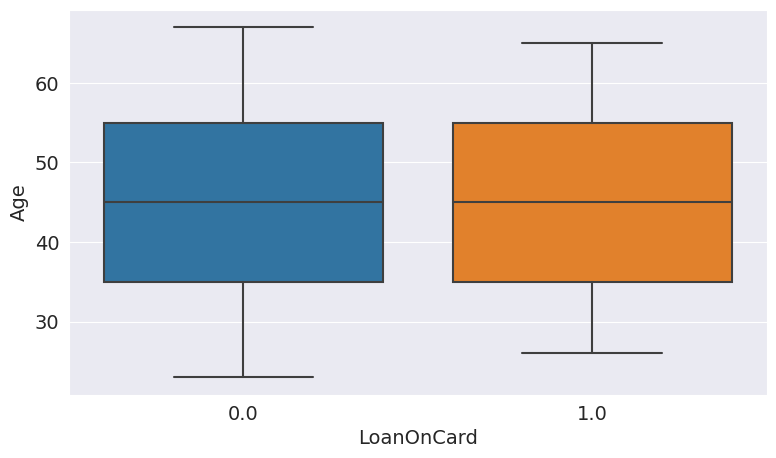

In [ ]:
sns.boxplot(data=df,x='LoanOnCard',y='Age')

<Axes: xlabel='LoanOnCard'>

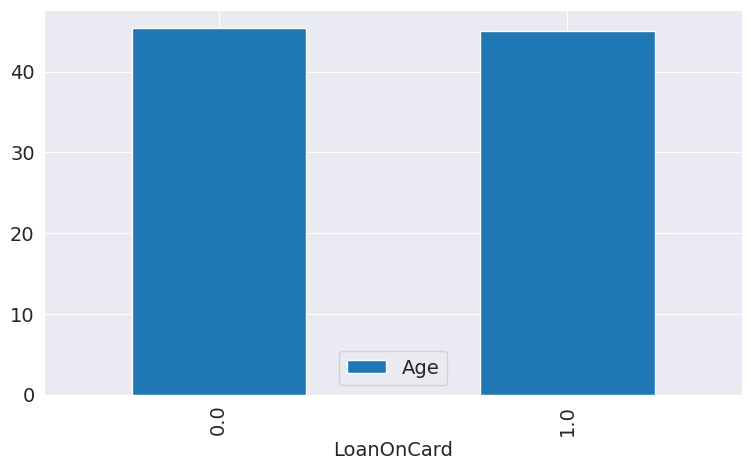

In [ ]:
df.groupby('LoanOnCard')[['Age']].mean().reset_index().plot(kind='bar',x='LoanOnCard',y='Age')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='LoanOnCard', ylabel='CustomerSince'>

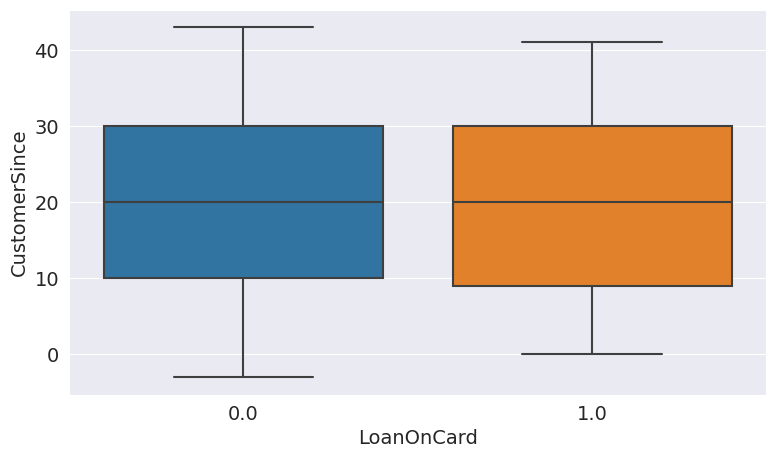

In [ ]:
sns.boxplot(data=df,x='LoanOnCard',y='CustomerSince')

<Axes: xlabel='LoanOnCard'>

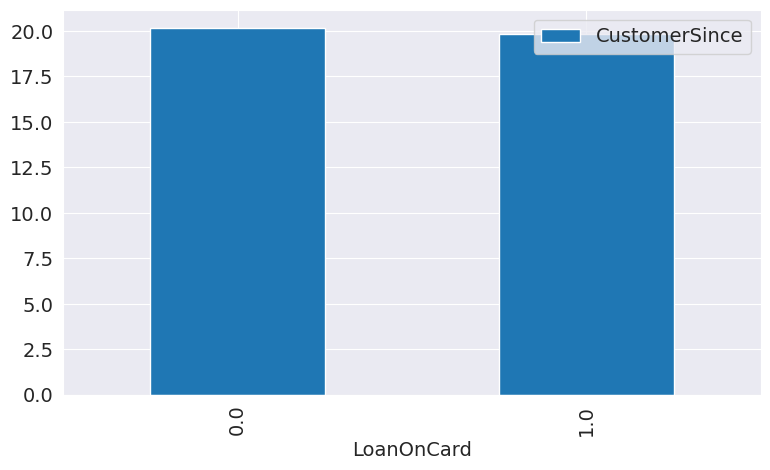

In [ ]:
df.groupby(by=['LoanOnCard'])['CustomerSince'].mean().reset_index().plot(kind='bar',x='LoanOnCard',y='CustomerSince')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='LoanOnCard', ylabel='MonthlyAverageSpend'>

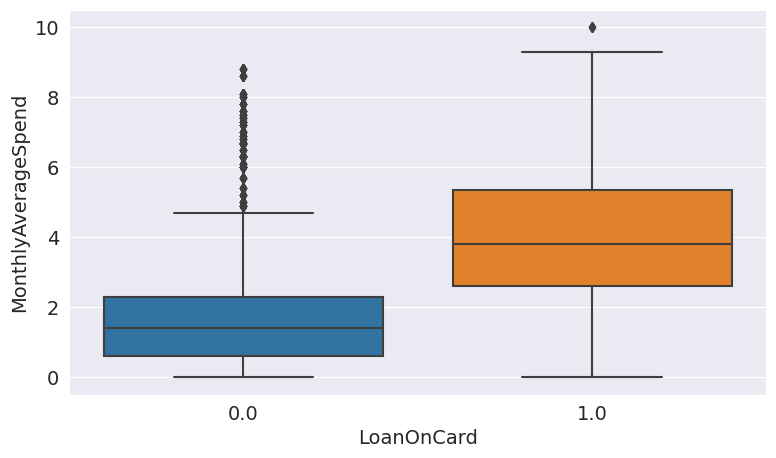

In [ ]:
sns.boxplot(data=df,x='LoanOnCard',y='MonthlyAverageSpend')

<Axes: xlabel='LoanOnCard'>

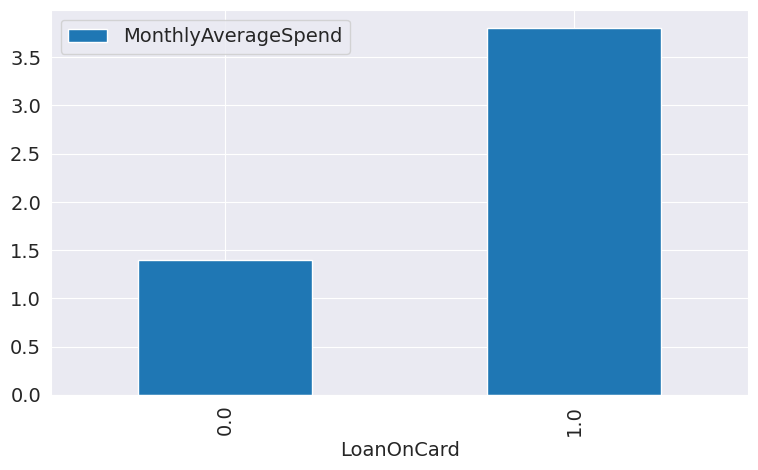

In [ ]:
df.groupby('LoanOnCard')[['MonthlyAverageSpend']].median().reset_index().plot(kind='bar',x='LoanOnCard',y='MonthlyAverageSpend')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='LoanOnCard', ylabel='Mortgage'>

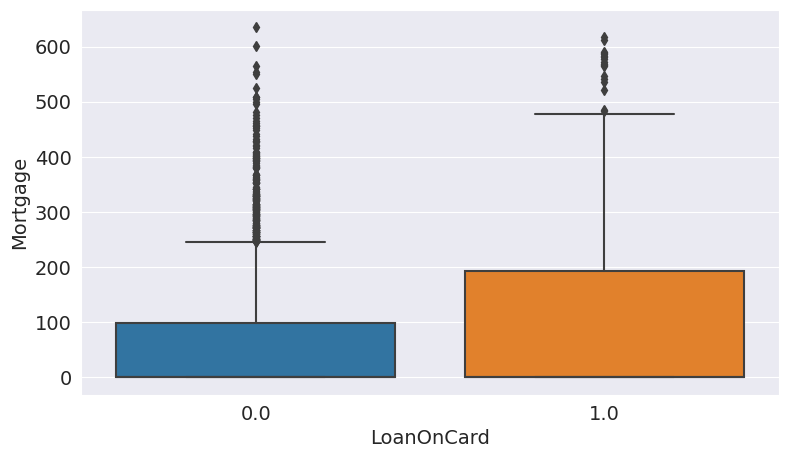

In [ ]:
sns.boxplot(data=df,x='LoanOnCard',y='Mortgage')

<Axes: xlabel='LoanOnCard'>

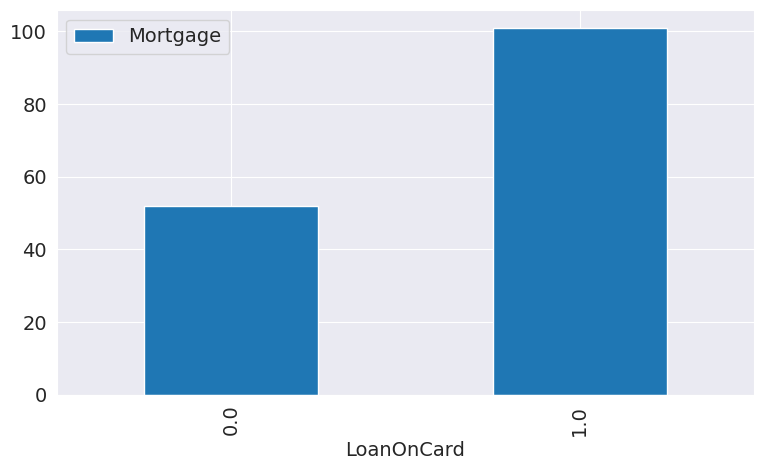

In [ ]:
df.groupby('LoanOnCard')[['Mortgage']].mean().reset_index().plot(kind='bar',x='LoanOnCard',y='Mortgage')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='LoanOnCard', ylabel='HighestSpend'>

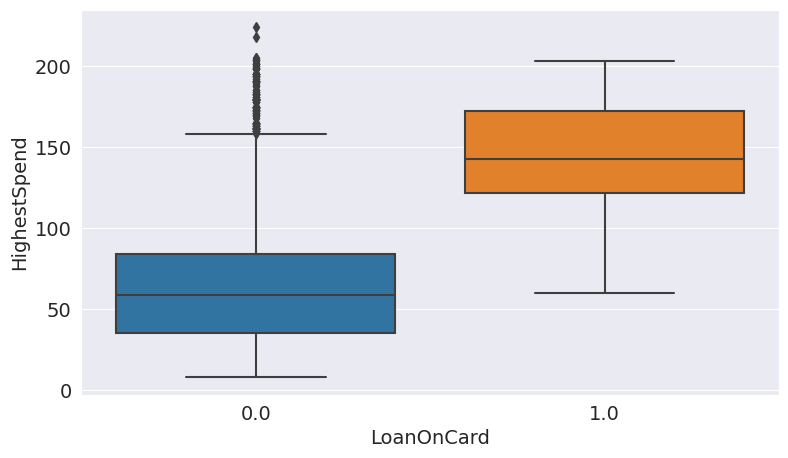

In [ ]:
sns.boxplot(data=df,x='LoanOnCard',y='HighestSpend')

<Axes: xlabel='LoanOnCard'>

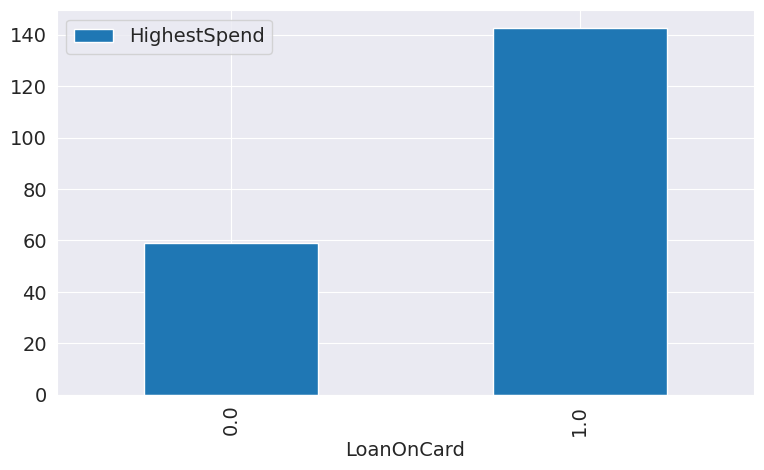

In [ ]:
df.groupby("LoanOnCard")[['HighestSpend']].median().reset_index().plot(kind='bar',x='LoanOnCard',y='HighestSpend')

Text(0.5, 1.0, 'Scatter plot of MonthlyAverageSpend vs HighestSpend')

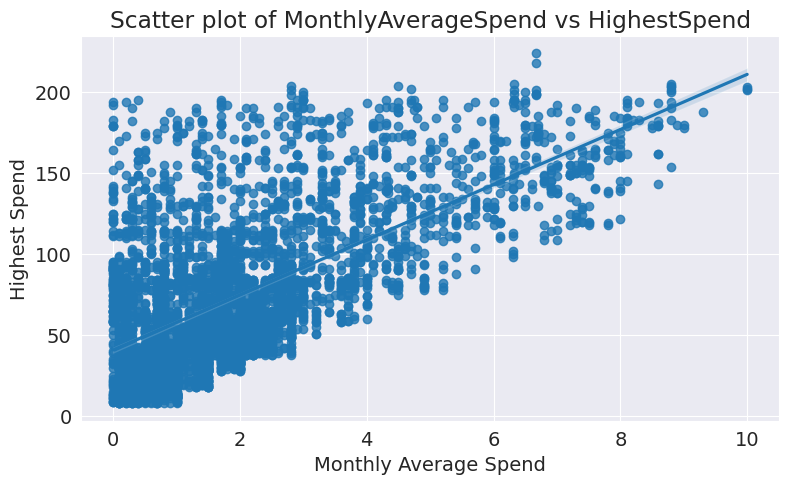

In [ ]:
ax = sns.regplot(x='MonthlyAverageSpend', y='HighestSpend', data=df)
ax.set_xlabel('Monthly Average Spend')
ax.set_ylabel('Highest Spend')
ax.set_title('Scatter plot of MonthlyAverageSpend vs HighestSpend')

Text(0.5, 1.0, 'Scatter plot of MonthlyAverageSpend vs Age')

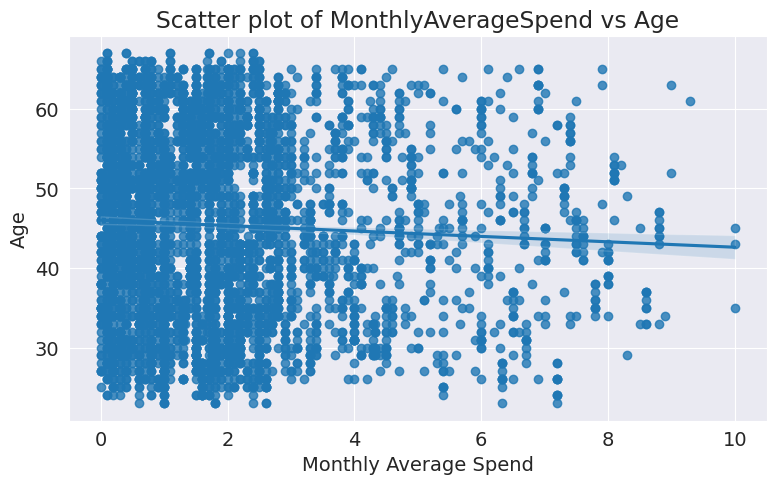

In [ ]:
ax=sns.regplot(data=df,x='MonthlyAverageSpend',y='Age')
ax.set_xlabel('Monthly Average Spend')
ax.set_ylabel('Age')
ax.set_title('Scatter plot of MonthlyAverageSpend vs Age')

Text(0.5, 1.0, 'Scatter plot of MonthlyAverageSpend vs Mortgage')

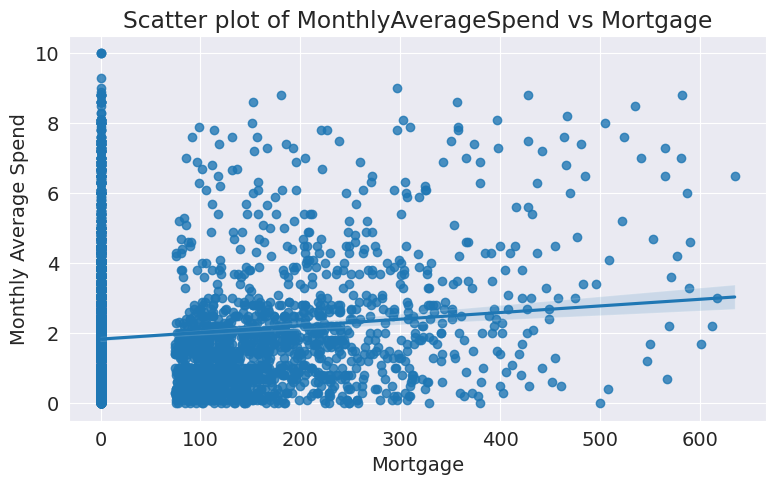

In [ ]:
ax=sns.regplot(x='Mortgage',y='MonthlyAverageSpend',data=df)
ax.set_ylabel('Monthly Average Spend')
ax.set_xlabel('Mortgage')
ax.set_title('Scatter plot of MonthlyAverageSpend vs Mortgage')

<Axes: >

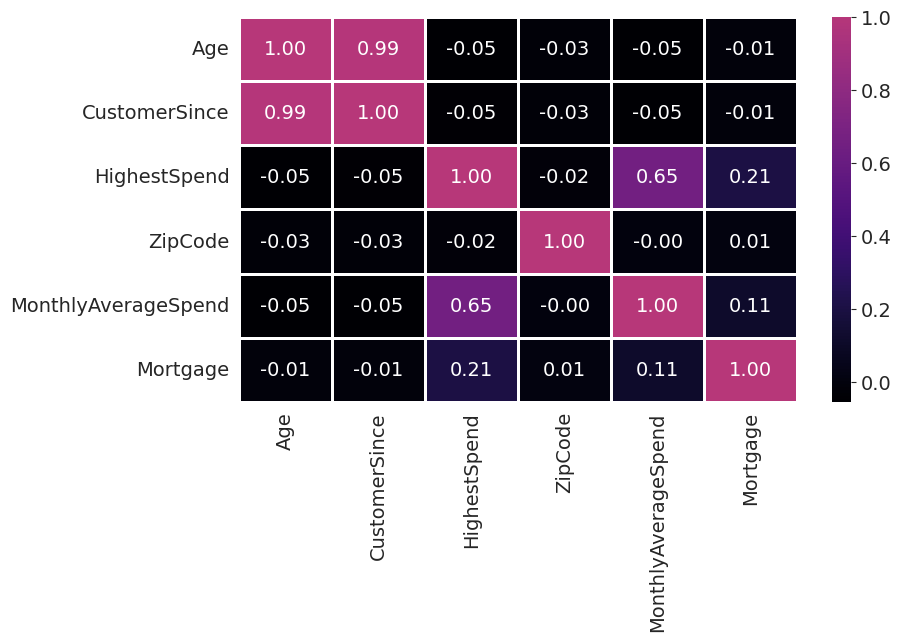

In [ ]:
#Multivarivate Anaysis
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=1,center=1,cmap='magma')

Text(0.5, 0.98, 'Monthly Aveage Spend Vs Level Vs LoanOnCard')

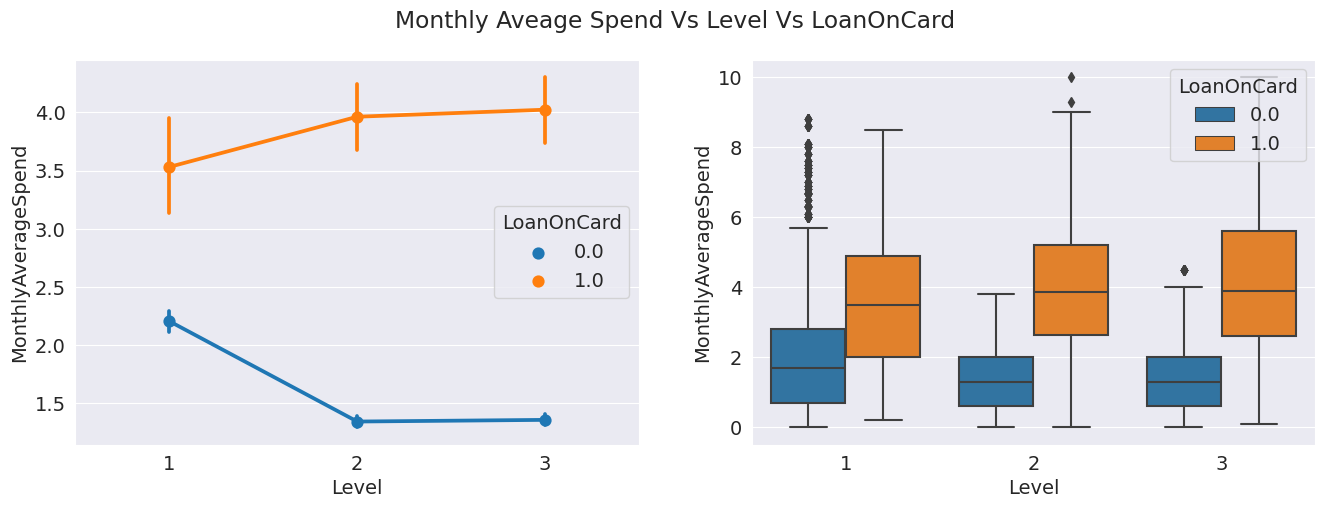

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(16,5))
sns.pointplot(x='Level',y='MonthlyAverageSpend',hue='LoanOnCard',data=df,ax=axes[0])
sns.boxplot(x='Level',y='MonthlyAverageSpend',hue='LoanOnCard',data=df,ax=axes[1])
fig.suptitle("Monthly Aveage Spend Vs Level Vs LoanOnCard")

Text(0.5, 0.98, 'Monthly Aveage Spend Vs InternetBanking Vs LoanOnCard')

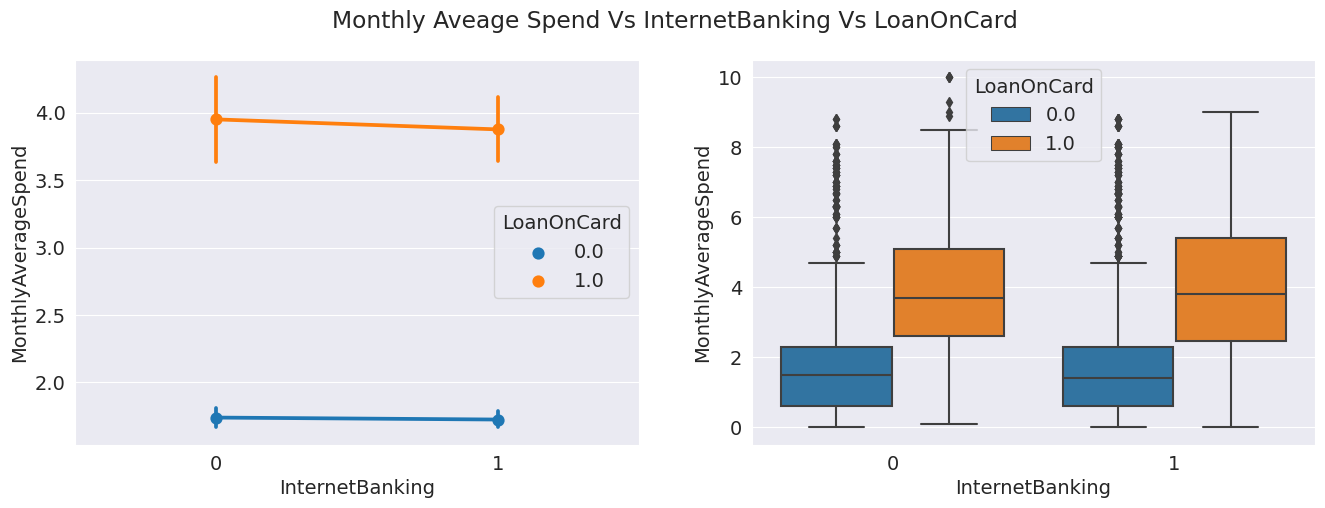

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(16,5))
sns.pointplot(x='InternetBanking',y='MonthlyAverageSpend',hue='LoanOnCard',data=df,ax=axes[0])
sns.boxplot(x='InternetBanking',y='MonthlyAverageSpend',hue='LoanOnCard',data=df,ax=axes[1])
fig.suptitle("Monthly Aveage Spend Vs InternetBanking Vs LoanOnCard")

Text(0.5, 0.98, 'Monthly Aveage Spend Vs CreditCard Vs LoanOnCard')

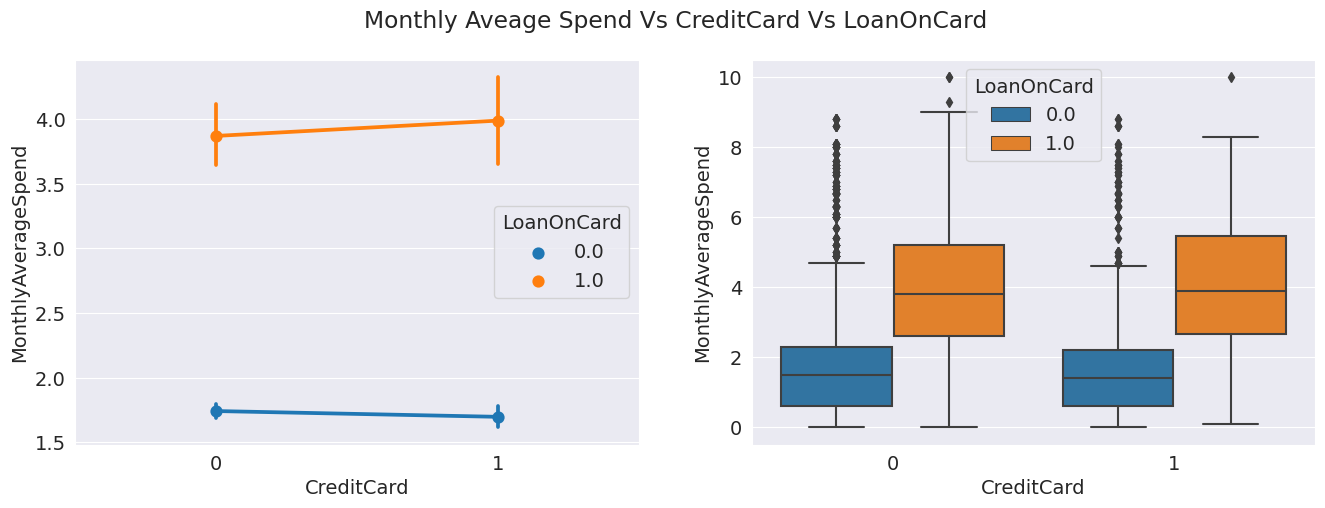

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(16,5))
sns.pointplot(x='CreditCard',y='MonthlyAverageSpend',hue='LoanOnCard',data=df,ax=axes[0])
sns.boxplot(x='CreditCard',y='MonthlyAverageSpend',hue='LoanOnCard',data=df,ax=axes[1])
fig.suptitle("Monthly Aveage Spend Vs CreditCard Vs LoanOnCard")

In [ ]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

In [ ]:
for c in col:
  q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
  IQR=q75-q25
  upper=q75+(1.5*IQR)
  lower=q25-(1.5*IQR)
  Outliers=[i for i in df[c] if i < lower or i > upper]
  print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
  print('\n')

  #taking mean of a column without considering outliers
  df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
  mean=int(df_include[c].mean())
  print('{} Mean of {} is {}'.format('\033[1m',c,mean))
  print('\n')

  #Replacing it mean

  df[c] = np.where(df[c]>upper,mean,df[c])
  df[c] = np.where(df[c]<lower,mean,df[c])
  Outliers=[i for i in df[c] if i < lower or i > upper]
  print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
  print('\n')


 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
x=df.drop(['LoanOnCard','ZipCode'],axis=1)
y=df['LoanOnCard'].astype(int)

In [901]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=43)

In [891]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score,classification_report

In [870]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train,y_train)
print('Accuracy on Test data:',roc_auc_score(y_test,log_model.predict_proba(x_test)[:,1]))
print('Accuracy on Train data:',roc_auc_score(y_train,log_model.predict_proba(x_train)[:,1]))

Accuracy on Test data: 0.9441255521293441
Accuracy on Train data: 0.9575047179386932


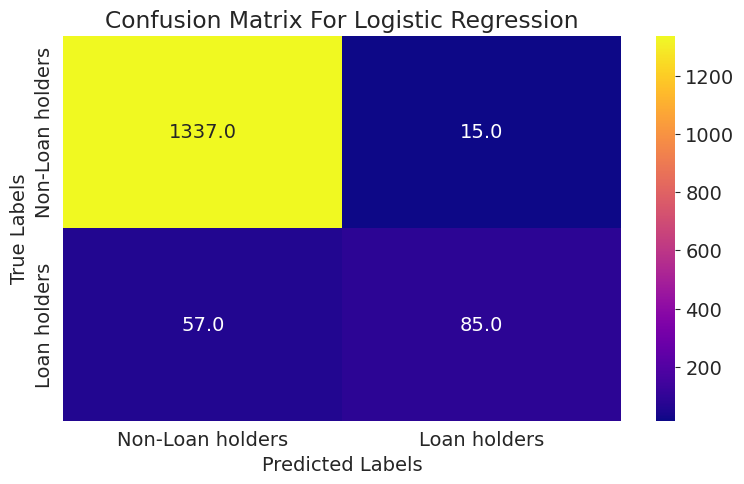

In [919]:
log_pred= log_model.predict(x_test)
cm = confusion_matrix(y_test,log_pred)
cm_df = pd.DataFrame(cm)
cm_df.rename({0:"Non-Loan holders",1:"Loan holders"},axis=0,inplace=True)
cm_df.rename({0:"Non-Loan holders",1:"Loan holders"},axis=1,inplace=True)
sns.heatmap(cm_df, annot=True, cmap="plasma",fmt='.1f')
plt.title("Confusion Matrix For Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [893]:
print("classification  Matrix:\n",classification_report(y_test,log_pred))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1352
           1       0.85      0.60      0.70       142

    accuracy                           0.95      1494
   macro avg       0.90      0.79      0.84      1494
weighted avg       0.95      0.95      0.95      1494



# Naiybe Base

In [896]:
from sklearn.naive_bayes import GaussianNB

In [904]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
print('Accuracy on Test data:',roc_auc_score(y_test,nb_model.predict_proba(x_test)[:,1]))
print('Accuracy on Train data:',roc_auc_score(y_train,nb_model.predict_proba(x_train)[:,1]))

Accuracy on Test data: 0.9101435536294691
Accuracy on Train data: 0.926485680774118


Text(0.5, 20.722222222222214, 'Predicted Labels')

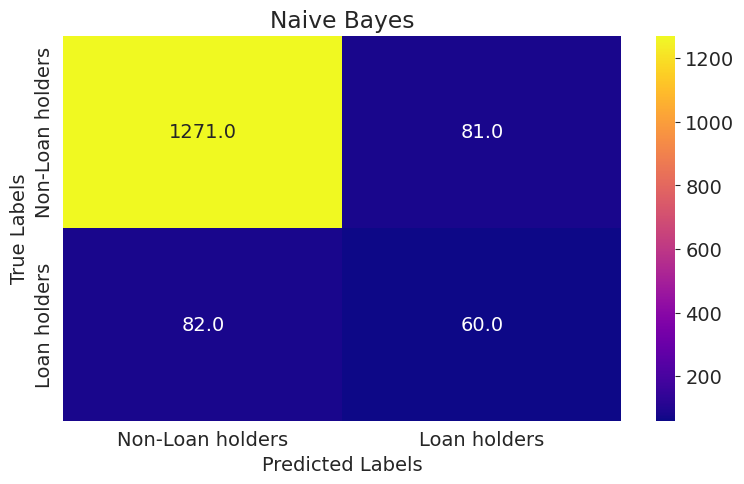

In [917]:
nb_pred = nb_model.predict(x_test)
cm = confusion_matrix(y_test,nb_pred)
cm_df = pd.DataFrame(cm)
cm_df.rename({0:"Non-Loan holders",1:'Loan holders'},axis=0,inplace=True)
cm_df.rename({0:"Non-Loan holders",1:"Loan holders"},axis=1,inplace=True)
sns.heatmap(cm_df,annot=True,cmap='plasma',fmt='.1f')
plt.title('Naive Bayes')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [920]:
print("classification  Matrix:\n ",classification_report(y_test,nb_pred))

classification  Matrix:
                precision    recall  f1-score   support

           0       0.94      0.94      0.94      1352
           1       0.43      0.42      0.42       142

    accuracy                           0.89      1494
   macro avg       0.68      0.68      0.68      1494
weighted avg       0.89      0.89      0.89      1494



# Decision Tree

In [921]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='gini',random_state = 43)

In [922]:
ma = [3,5,10,25]
ml = [15,30,70]
md = [15,30, 70]
model_preformance_data =[]

for i in ma:
  for j in ml:
    for k in md:

      mp = DecisionTreeClassifier(criterion = 'gini',max_depth = i,min_samples_leaf=j,min_samples_split=k)
      dt_model = mp.fit(x_train,y_train)
      test_pred = dt_model.predict_proba(x_test)
      train_pred = dt_model.predict_proba(x_train)

      t1 = "max_depth"+str(i)+"_min_leaf"+str(j)+"_min_split"+str(k)
      t2 = [t1,round(roc_auc_score(y_train, train_pred[:,1]),4),round(roc_auc_score(y_test, test_pred[:,1]),4)]
      model_preformance_data.append(t2)

In [923]:
apl = [0.001,0.005,0.01,0.05,0.1]
for k in apl:
  mp = DecisionTreeClassifier(criterion='gini',ccp_alpha=k,random_state=18)
  dt_model = mp.fit(x_train,y_train)
  
  test_pred = dt_model.predict_proba(x_test)
  train_pred = dt_model.predict_proba(x_train)
  t1 = 'ccp_alpha'+str(k)
  t2 = [t1,round(roc_auc_score(y_train, train_pred[:,1]),4),round(roc_auc_score(y_test, test_pred[:,1]),4)]
  model_preformance_data.append(t2)
  

In [924]:
df2 = pd.DataFrame(model_preformance_data)
df2.rename({0:"Model",1:"Train AUC",2:"Test AUC"},axis= 1,inplace = True)

In [925]:
df2.sort_values(['Test AUC','Train AUC'],ascending= False).head(10)

,Model,Train AUC,Test AUC
20,max_depth10_min_leaf15_min_split70,0.9958,0.9934
29,max_depth25_min_leaf15_min_split70,0.9958,0.9934
36,ccp_alpha0.001,0.9951,0.9925
21,max_depth10_min_leaf30_min_split15,0.9950,0.9924
22,max_depth10_min_leaf30_min_split30,0.9950,0.9924
30,max_depth25_min_leaf30_min_split15,0.9950,0.9924
31,max_depth25_min_leaf30_min_split30,0.9950,0.9924
11,max_depth5_min_leaf15_min_split70,0.9942,0.9923
23,max_depth10_min_leaf30_min_split70,0.9943,0.9921
32,max_depth25_min_leaf30_min_split70,0.9943,0.9921


In [926]:
dt_model = DecisionTreeClassifier(criterion = 'gini',max_depth = 10,min_samples_leaf=15,min_samples_split=70,ccp_alpha=0.001)

In [928]:
dt_model.fit(x_train,y_train)
print('Accuracy on Test data:',roc_auc_score(y_test,dt_model.predict_proba(x_test)[:,1]))
print('Accuracy on Train data:',roc_auc_score(y_train,dt_model.predict_proba(x_train)[:,1]))

Accuracy on Test data: 0.9928223185265439
Accuracy on Train data: 0.9942393216694361


Text(0.5, 20.722222222222214, 'Predicted Labels')

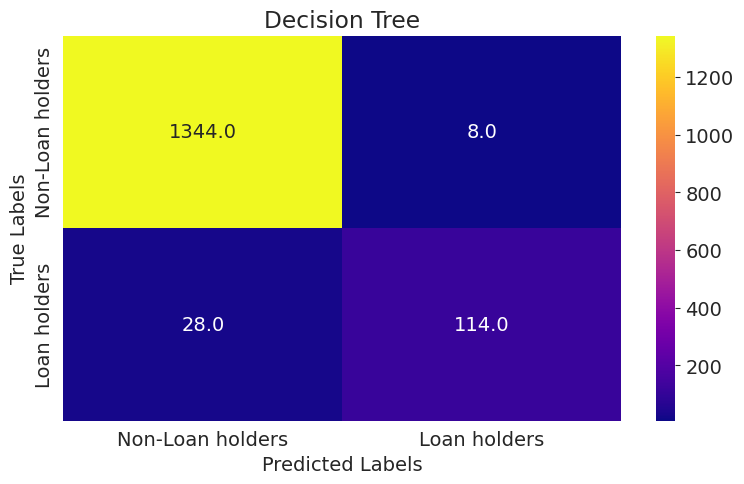

In [931]:
dt_pred = dt_model.predict(x_test)
cm = confusion_matrix(y_test,dt_pred)
cm_df = pd.DataFrame(cm)
cm_df.rename({0:"Non-Loan holders",1:'Loan holders'},axis=0,inplace=True)
cm_df.rename({0:"Non-Loan holders",1:"Loan holders"},axis=1,inplace=True)
sns.heatmap(cm_df,annot=True,cmap='plasma',fmt='.1f')
plt.title('Decision Tree')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [934]:
print("Confusion Matrixs:\n",classification_report(y_test,dt_pred))

Confusion Matrixs:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1352
           1       0.93      0.80      0.86       142

    accuracy                           0.98      1494
   macro avg       0.96      0.90      0.93      1494
weighted avg       0.98      0.98      0.98      1494



In [948]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters to search over
n_estimators = [100, 200, 300]
max_depth = [5, 10, 20, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['sqrt', 'log2']

# Create a list to store the results
results = []

# Loop over all hyperparameter combinations
for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
                for f in max_features:
                    # Create a random forest classifier with the current hyperparameters
                    rf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l, max_features=f, random_state=42)
                    
                    # Fit the model to the training data
                    rf.fit(x_train, y_train)
                    
                    test_pred = rf.predict_proba(x_test)
                    train_pred = rf.predict_proba(x_train)

                    t1 = "n_estimators_"+str(n)+"_max_depth_"+str(d)+"_min_samples_split_"+str(s)+"_min_samples_leaf_"+str(l)+"_max_features_"+str(f)
                    t2 = [t1,round(roc_auc_score(y_train, train_pred[:,1]),4),round(roc_auc_score(y_test, test_pred[:,1]),4)]
                    results.append(t2)


In [951]:
df3 = pd.DataFrame(results)
df3.rename({0:"Model",1:"Train AUC",2:"Test AUC"},axis= 1,inplace = True)

In [ ]:
df3.sort_values(['Test AUC','Train AUC'],ascending= False).head(10)

In [957]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

In [958]:
rf_model.fit(x_train,y_train)
print('Accuracy on Test data:',roc_auc_score(y_test,rf_model.predict_proba(x_test)[:,1]))
print('Accuracy on Train data:',roc_auc_score(y_train,rf_model.predict_proba(x_train)[:,1]))

Accuracy on Test data: 0.9936869739144929
Accuracy on Train data: 1.0


Text(0.5, 20.722222222222214, 'Predicted Labels')

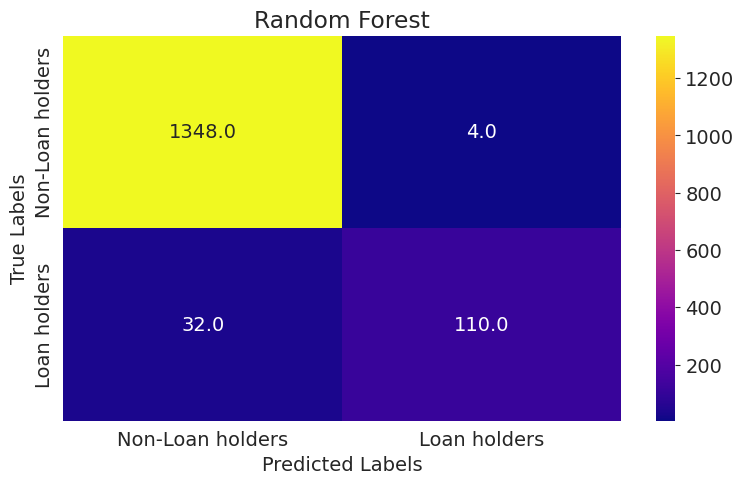

In [959]:
rf_pred = rf_model.predict(x_test)
cm = confusion_matrix(y_test,rf_pred)
cm_df = pd.DataFrame(cm)
cm_df.rename({0:"Non-Loan holders",1:'Loan holders'},axis=0,inplace=True)
cm_df.rename({0:"Non-Loan holders",1:"Loan holders"},axis=1,inplace=True)
sns.heatmap(cm_df,annot=True,cmap='plasma',fmt='.1f')
plt.title('Random Forest')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [947]:
print("Confusion Matrixs:\n",classification_report(y_test,rf_pred))

Confusion Matrixs:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1352
           1       0.96      0.77      0.86       142

    accuracy                           0.98      1494
   macro avg       0.97      0.89      0.92      1494
weighted avg       0.98      0.98      0.97      1494



Text(0.5, 0.98, 'ROC AUC Curves')

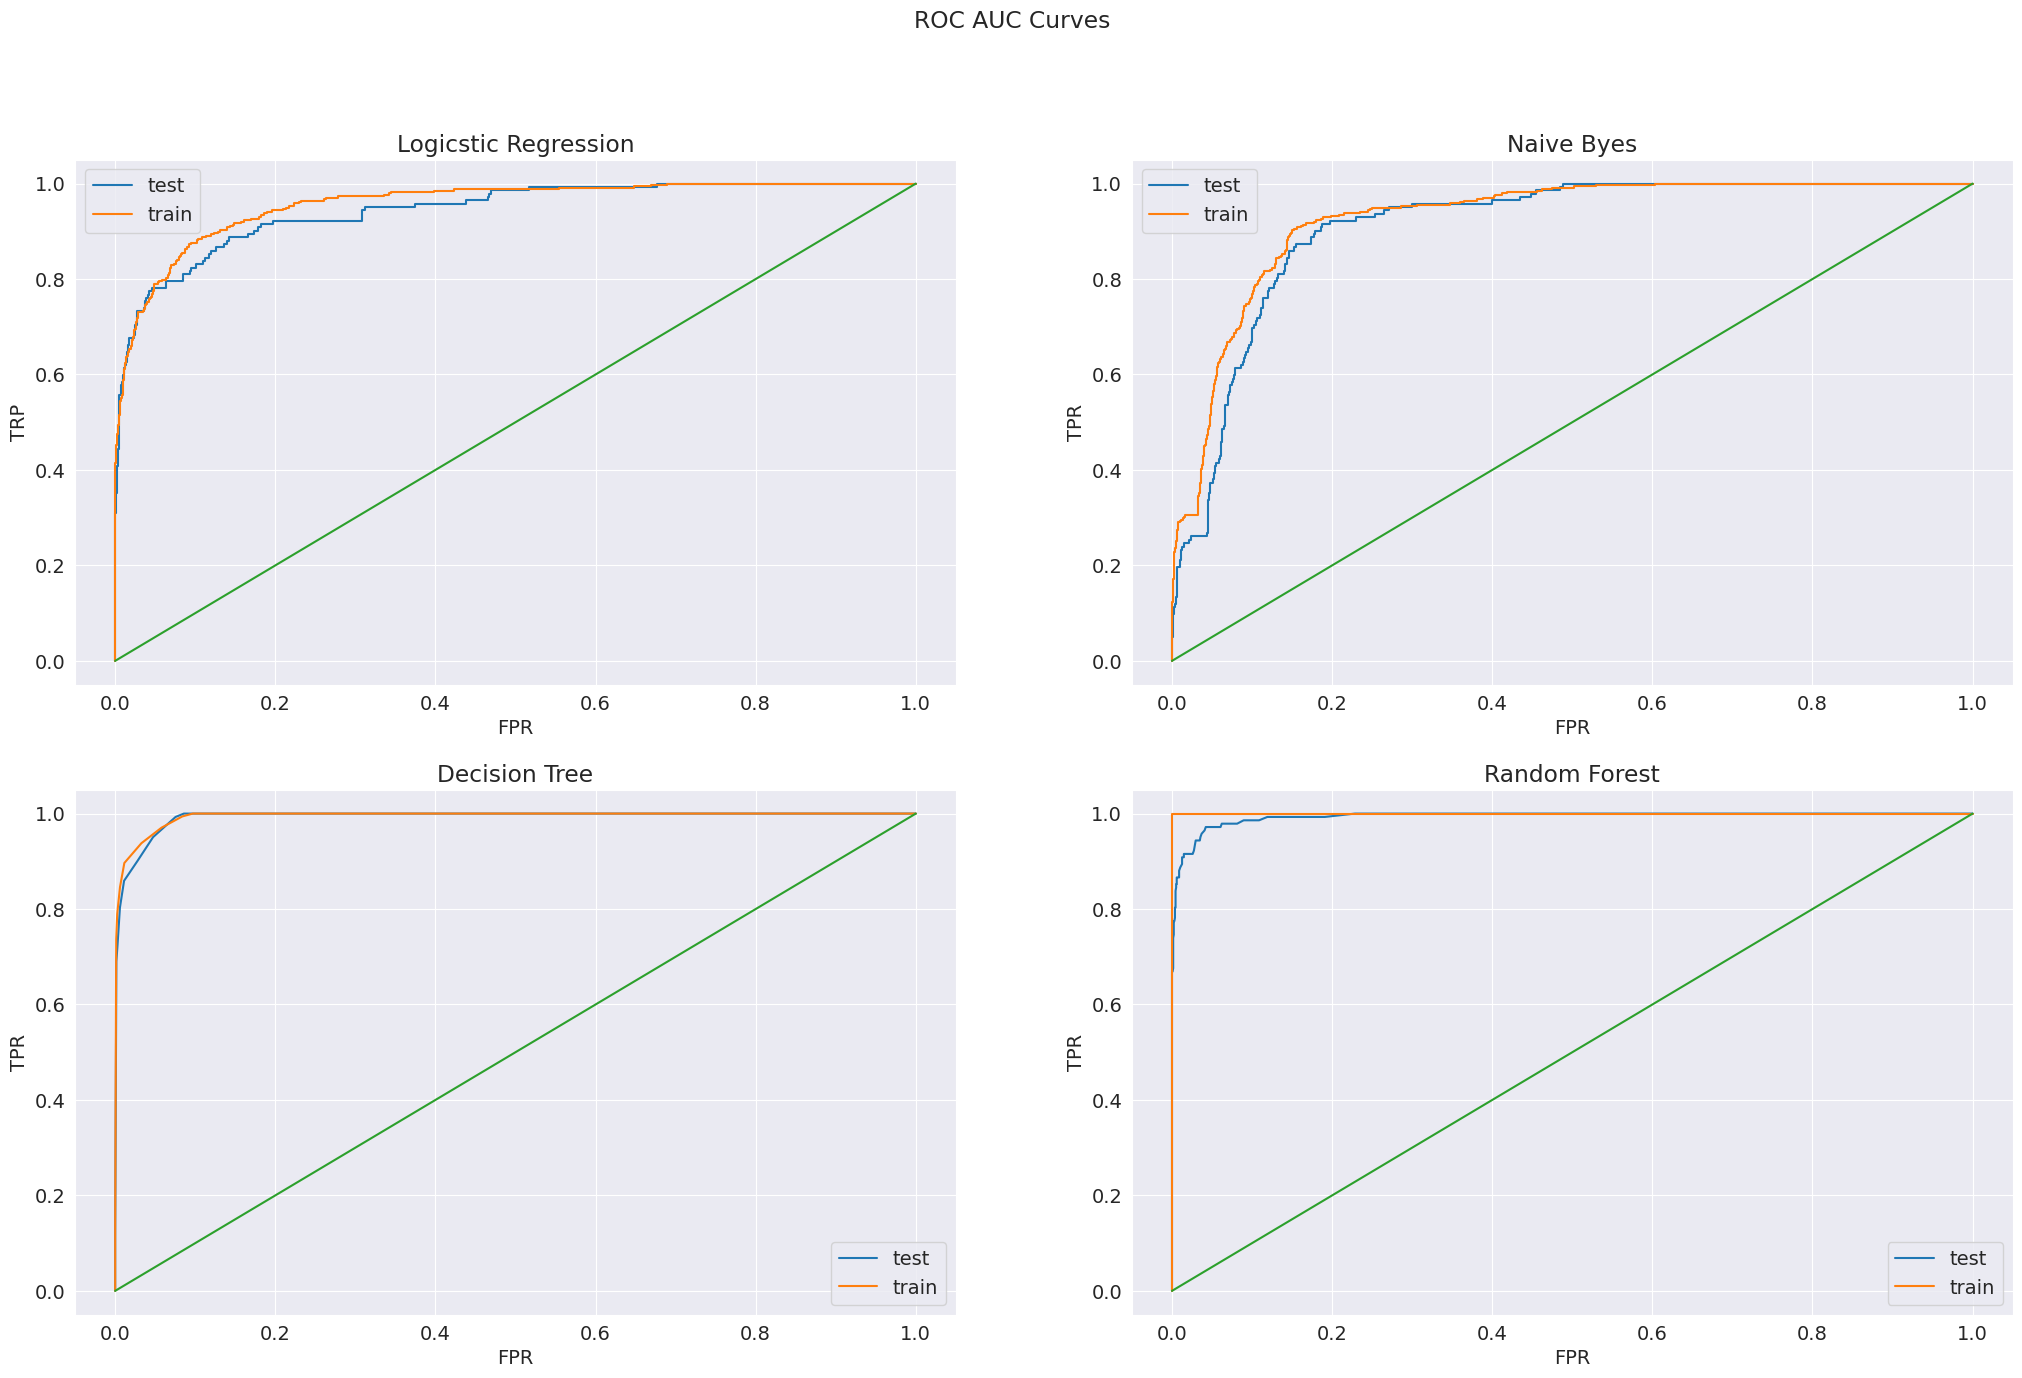

In [973]:
fig,axes = plt.subplots(2,2,figsize=(25,15))
fpr_log_test,tpr_log_test,thresholds = roc_curve(y_test,log_model.predict_proba(x_test)[:,1])
fpr_log_train,tpr_log_train,thresholds2 = roc_curve(y_train,log_model.predict_proba(x_train)[:,1])

fpr_nb_test,tpr_nb_test,thresholds = roc_curve(y_test,nb_model.predict_proba(x_test)[:,1])
fpr_nb_train,tpr_nb_train,thresholds2 = roc_curve(y_train,nb_model.predict_proba(x_train)[:,1])

fpr_dt_test,tpr_dt_test,thresholds = roc_curve(y_test,dt_model.predict_proba(x_test)[:,1])
fpr_dt_train,tpr_dt_train,thresholds2 = roc_curve(y_train,dt_model.predict_proba(x_train)[:,1])

fpr_rf_test,tpr_rf_test,thresholds = roc_curve(y_test,rf_model.predict_proba(x_test)[:,1])
fpr_rf_train,tpr_rf_train,thresholds2 = roc_curve(y_train,rf_model.predict_proba(x_train)[:,1])


axes[0,0].set_title("Logicstic Regression")
axes[0,0].plot(fpr_log_test,tpr_log_test,label='test')
axes[0,0].plot(fpr_log_train,tpr_log_train,label='train')
axes[0,0].set_xlabel("FPR")
axes[0,0].set_ylabel("TRP")
axes[0,0].plot([0,1])
axes[0,0].legend()


axes[0,1].set_title("Naive Byes")
axes[0,1].plot(fpr_nb_test,tpr_nb_test,label = 'test')
axes[0,1].plot(fpr_nb_train,tpr_nb_train,label = 'train')
axes[0,1].set_xlabel("FPR")
axes[0,1].set_ylabel("TPR")
axes[0,1].plot([0,1])
axes[0,1].legend()


axes[1,0].set_title("Decision Tree")
axes[1,0].plot(fpr_dt_test,tpr_dt_test,label = 'test')
axes[1,0].plot(fpr_dt_train,tpr_dt_train,label = 'train')
axes[1,0].set_xlabel("FPR")
axes[1,0].set_ylabel("TPR")
axes[1,0].plot([0,1])
axes[1,0].legend()


axes[1,1].set_title("Random Forest")
axes[1,1].plot(fpr_rf_test,tpr_rf_test,label = 'test')
axes[1,1].plot(fpr_rf_train,tpr_rf_train,label = 'train')
axes[1,1].set_xlabel("FPR")
axes[1,1].set_ylabel("TPR")
axes[1,1].plot([0,1])
axes[1,1].legend()

fig.suptitle("ROC AUC Curves")